2Dfft.ipynb - File to learn about how 2D FFT works in numpy and investigate relationship between filter and wavelength of wavefronts.

Author: Anderson Steckler

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def hann1dp(x, N, x0):
    return np.cos(np.pi * (x-x0)/N) ** 2

In [22]:
def hann2d(x, y, Nx, Ny, x0, y0): 
    val = hann1dp(x, Nx, x0) * hann1dp(y, Ny, y0)

    return np.where((np.abs(x-x0) <= 0.5 * Nx) & (np.abs(y-y0) <= 0.5 * Ny), val, 0)

hann_vec = np.vectorize(hann2d)

In [23]:
# Going from K space to get wavefronts
# Generate Frequencies
xlin = np.linspace(-1, 1, 100)
ylin = np.linspace(-1, 1, 100)

xf, yf = np.meshgrid(xlin, ylin)
zz = xf * 0

In [24]:
hx, hy, r = 0.5, 0.5, 0.1
hann_z = hann2d(xf, yf, 2 * r, 2 * r, hx, hy) + hann2d(xf, yf, 2 * r, 2 * r, -hx, -hy) 

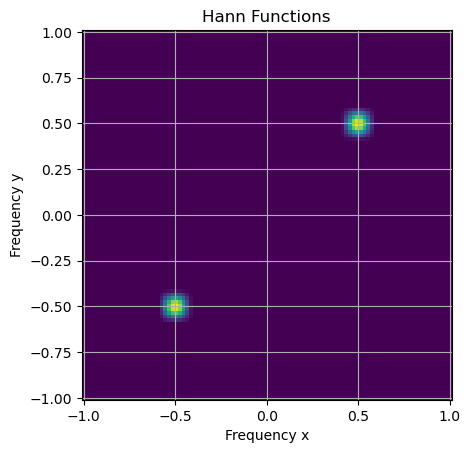

In [25]:
fig, ax = plt.subplots()

ax.pcolormesh(xf, yf, hann_z)
ax.set_title("Hann Functions")
ax.set_xlabel("Frequency x")
ax.set_ylabel("Frequency y")
ax.set_aspect('equal')
ax.grid(True)

In [26]:
rs = np.fft.ifft2(hann_z)
rs = np.fft.fftshift(rs)

# Real space
nx, ny = xlin.size, ylin.size
dfx, dfy = xlin[1] - xlin[0], ylin[1] - ylin[0]
rx, ry = np.sort(np.fft.fftfreq(nx, d=dfx)), np.sort(np.fft.fftfreq(ny, d=dfy))

In [27]:
print(rx)

[-24.75  -24.255 -23.76  -23.265 -22.77  -22.275 -21.78  -21.285 -20.79
 -20.295 -19.8   -19.305 -18.81  -18.315 -17.82  -17.325 -16.83  -16.335
 -15.84  -15.345 -14.85  -14.355 -13.86  -13.365 -12.87  -12.375 -11.88
 -11.385 -10.89  -10.395  -9.9    -9.405  -8.91   -8.415  -7.92   -7.425
  -6.93   -6.435  -5.94   -5.445  -4.95   -4.455  -3.96   -3.465  -2.97
  -2.475  -1.98   -1.485  -0.99   -0.495   0.      0.495   0.99    1.485
   1.98    2.475   2.97    3.465   3.96    4.455   4.95    5.445   5.94
   6.435   6.93    7.425   7.92    8.415   8.91    9.405   9.9    10.395
  10.89   11.385  11.88   12.375  12.87   13.365  13.86   14.355  14.85
  15.345  15.84   16.335  16.83   17.325  17.82   18.315  18.81   19.305
  19.8    20.295  20.79   21.285  21.78   22.275  22.77   23.265  23.76
  24.255]


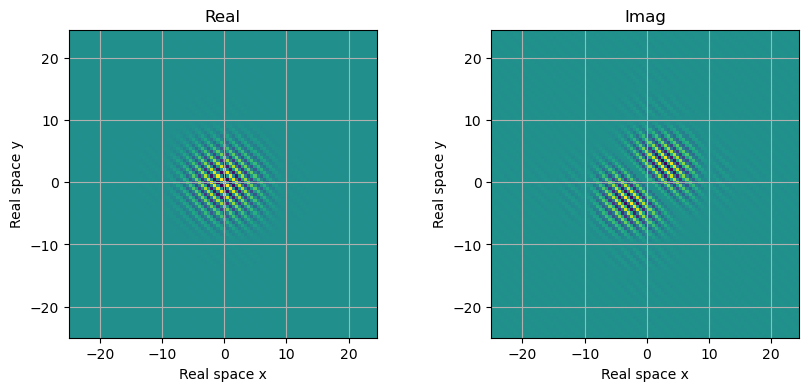

In [28]:
fig1, axs1 = plt.subplots(1, 2, figsize=(10, 4))

axs1[0].pcolormesh(rx, ry, np.real(rs))
axs1[0].set_title("Real")
axs1[0].set_xlabel("Real space x")
axs1[0].set_ylabel("Real space y")
axs1[0].set_aspect('equal')
axs1[0].grid(True)

axs1[1].pcolormesh(rx, ry, np.imag(rs))
axs1[1].set_title("Imag")
axs1[1].set_xlabel("Real space x")
axs1[1].set_ylabel("Real space y")
axs1[1].set_aspect('equal')
axs1[1].grid(True)

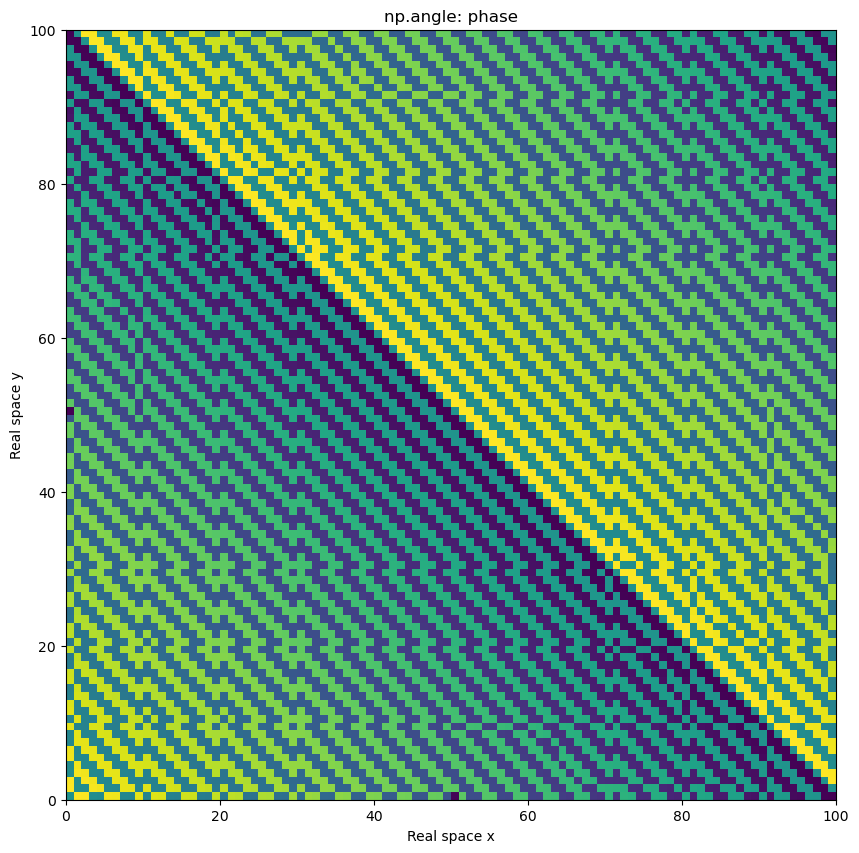

In [40]:
figc, axc = plt.subplots(figsize=(10, 10))

axc.pcolormesh(np.angle(rs))
axc.set_title("np.angle: phase")
axc.set_xlabel("Real space x")
axc.set_ylabel("Real space y")
axc.set_aspect('equal')

figc.savefig('test.png')

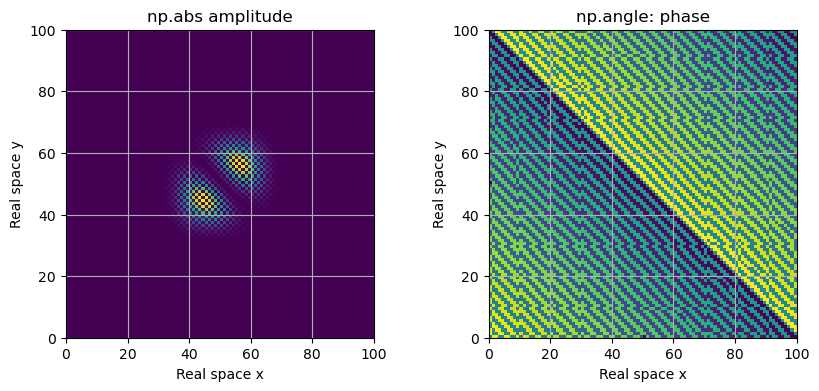

In [29]:
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 4))

axs2[0].pcolormesh(np.imag(rs) ** 2)
axs2[0].set_title("np.abs amplitude")
axs2[0].set_xlabel("Real space x")
axs2[0].set_ylabel("Real space y")
axs2[0].set_aspect('equal')
axs2[0].grid(True)

axs2[1].pcolormesh(np.angle(rs))
axs2[1].set_title("np.angle: phase")
axs2[1].set_xlabel("Real space x")
axs2[1].set_ylabel("Real space y")
axs2[1].set_aspect('equal')
axs2[1].grid(True)

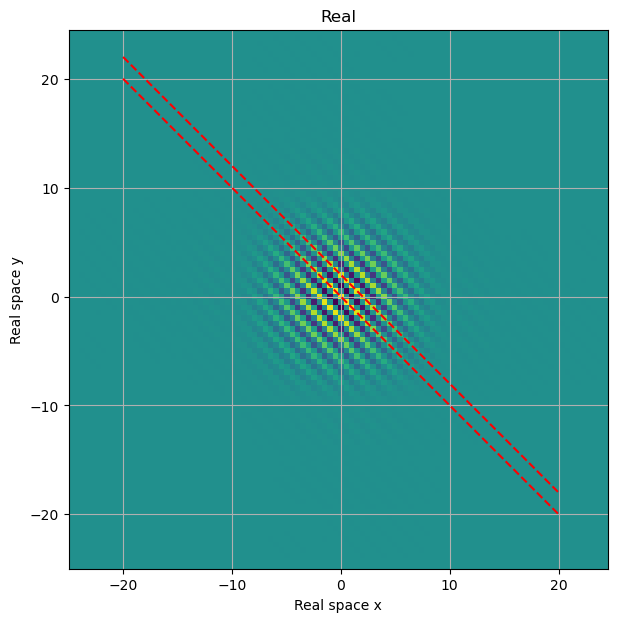

In [30]:
fig3, ax3 = plt.subplots(figsize=(7, 7))
ax3.pcolormesh(rx, ry, np.real(rs))
ax3.set_title("Real")
ax3.set_xlabel("Real space x")
ax3.set_ylabel("Real space y")
ax3.set_aspect('equal')
ax3.grid(True)

# Wavelength
hm = np.sqrt(hx **2 + hy ** 2) * 2 * np.pi # Magnitude of location of Hann window
wavel = 2 * np.pi / hm
m1, b1 = -hx/hy, 0
m2, b2 = -hx/hy, (m1 ** 2 + 1)/np.sqrt(m1 ** 2 + 1) * wavel

xl = np.linspace(-20, 20, 100)
yl1, yl2 = m1 * xl + b1, m2 * xl + b2

ax3.plot(xl, yl1, color='red', linestyle='dashed')
ax3.plot(xl, yl2, color='red', linestyle='dashed')